In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./thailand_co2_emission_1987_2022.csv')
data.head()

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35


## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2424 non-null   int64  
 1   month           2424 non-null   int64  
 2   source          2424 non-null   object 
 3   fuel_type       2424 non-null   object 
 4   emissions_tons  2424 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.8+ KB


In [7]:
data['fuel_type'].unique()

array(['oil', 'coal', 'natural_gas'], dtype=object)

In [8]:
data['source'].unique()

array(['transport', 'industry', 'other'], dtype=object)

In [5]:
# Aggregate emissions by year
yearly_emissions = data.groupby('year')['emissions_tons'].sum().reset_index()
yearly_emissions.head()

,year,emissions_tons
0,1987,33350.71
1,1988,37830.07
2,1989,45149.85
3,1990,51652.86
4,1991,54005.81


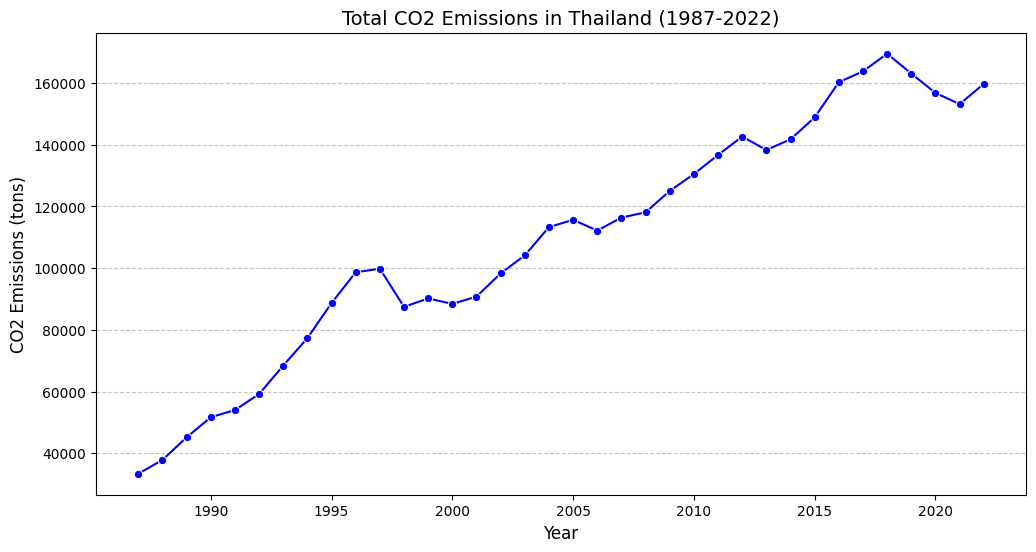

In [6]:
# Plot total CO2 emissions over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_emissions, x='year', y='emissions_tons', marker='o', color='blue')
plt.title('Total CO2 Emissions in Thailand (1987-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (tons)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Aggregate emissions by source and fuel type
source_emissions = data.groupby('source')['emissions_tons'].sum().reset_index()
fuel_type_emissions = data.groupby('fuel_type')['emissions_tons'].sum().reset_index()

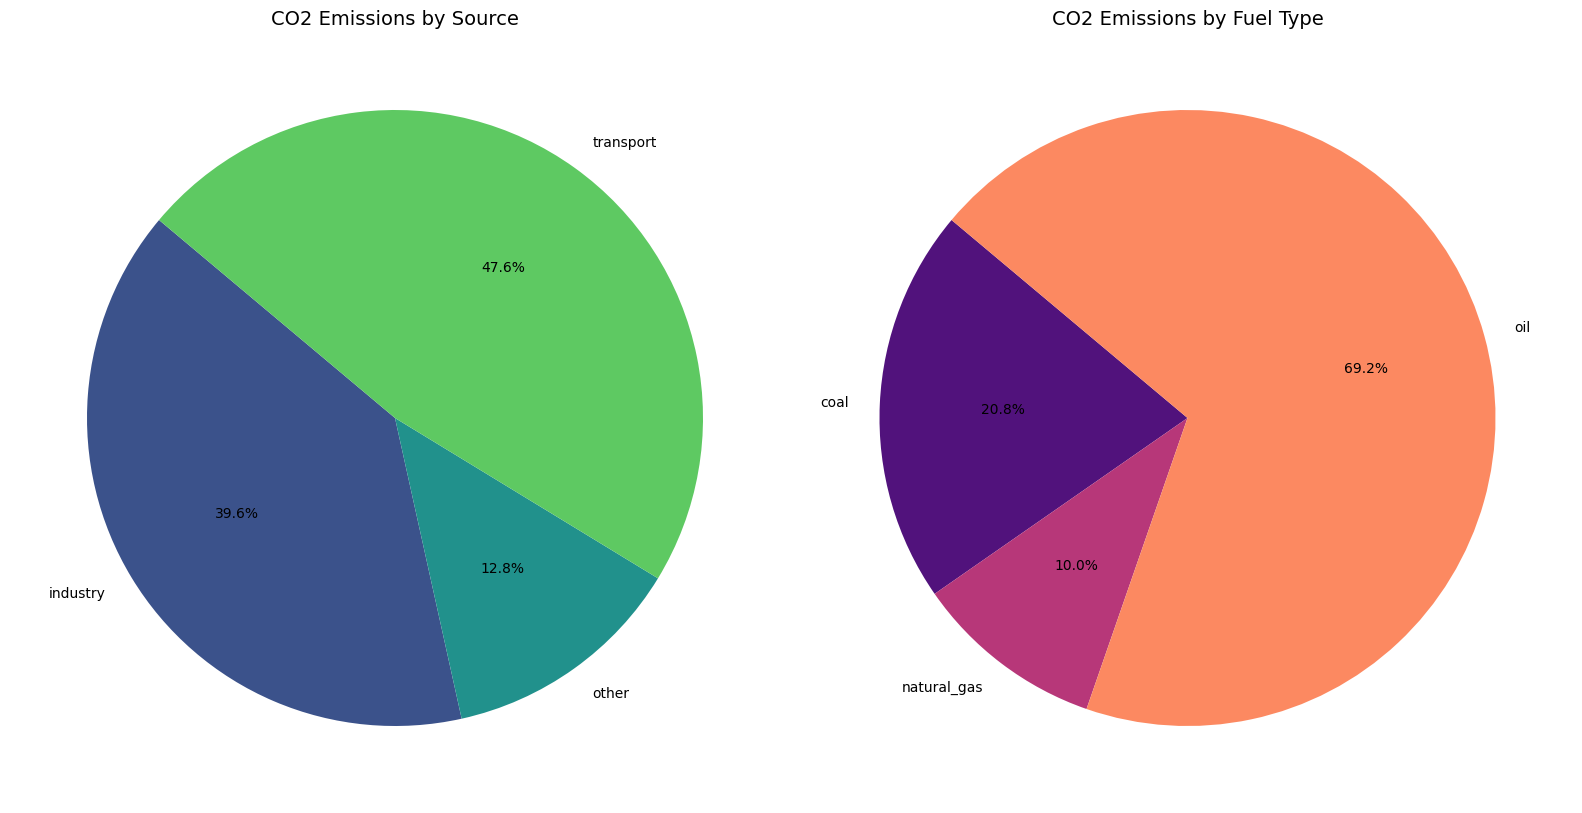

In [8]:
# Create pie charts for source and fuel type distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Source pie chart
axes[0].pie(
    source_emissions['emissions_tons'],
    labels=source_emissions['source'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(source_emissions))
)
axes[0].set_title('CO2 Emissions by Source', fontsize=14)

# Fuel type pie chart
axes[1].pie(
    fuel_type_emissions['emissions_tons'],
    labels=fuel_type_emissions['fuel_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('magma', len(fuel_type_emissions))
)
axes[1].set_title('CO2 Emissions by Fuel Type', fontsize=14)

plt.tight_layout()
plt.show()
